# <span style="color:blue">Programming for Data Science - DS-GA 1007</span>
## <span style="color:blue">Lecture 7: Numpy - Part II and Matplotlib</span>
---

## Contents:
### Numpy - Part II
- Broadcasting and Arithmetic Operations
- More about Fancy Indexing
- Comparison
- Advanced Operations

__References:__<br>
[https://www.datacamp.com/community/tutorials/python-numpy-tutorial](https://www.datacamp.com/community/tutorials/python-numpy-tutorial)

### Matplotlib
- Getting Started
- Components
- Text
- Annotations
- Legend

__References:__<br>
[https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python)<br>
[http://matplotlib.org/Matplotlib.pdf](http://matplotlib.org/Matplotlib.pdf)

---
## Numpy - Part II

### Broadcasting
- Basic operations on arrays (addition, etc.) are element-wise
- Element-wise operations work on arrays of the same size 
- __Broadcasting__ is a mechanism used to make element-wise operations doable on arrays with different sizes
  - It transforms arrays so that they all have the same size

#### Scalar Broadcasting
Employed when a scalar vs. array operation is performed.

In [39]:
import numpy as np

# creating a 5x5 array with random numbers
A = np.arange(25).reshape(5,5)

# defining a scalar
s = 5

# the + operataion is performed element-wise (it is not well defined otherwise)
B = s + A

print(A)
print(B)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]]


What numpy is doing when adding the scalar to the array
is to broadcasting the scalar first into a 5x5 array

$$
B = s + A = \left[\begin{array}{ccccc}
5 & 5 & 5 & 5 & 5\\
5 & 5 & 5 & 5 & 5\\
5 & 5 & 5 & 5 & 5\\
5 & 5 & 5 & 5 & 5\\
5 & 5 & 5 & 5 & 5
\end{array}\right] + 
\left[\begin{array}{ccccc} 
0  & 1 & 2 & 3 & 4 \\
5  & 6 & 7 & 8 & 9\\
10 & 11 & 12 & 13 & 14\\
15 & 16 & 17 & 18 & 19\\
20 & 21 & 22 & 23 & 24
\end{array}\right]
$$

#### Array Broadcasting
Broadcasting works similarly when performing element-wise operations between arrays, but:
- The two arrays must be compatible for broadcasting
  - the axis lengths match, or
  - either of the lengths is 1
- Broadcasting is then performed over the missing and/or length 1 dimensions

In [2]:
A = np.arange(25).reshape(5,5)
print(A.shape)

v = np.arange(5)
print(v.shape)

# the * operation is performed element-wise, broadcasting v first
# as the second dimension is not specified v is handled as a row array
B = v * A

print(v,'\n')
print(A,'\n')
print(B)

(5, 5)
(5,)
[0 1 2 3 4] 

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 

[[ 0  1  4  9 16]
 [ 0  6 14 24 36]
 [ 0 11 24 39 56]
 [ 0 16 34 54 76]
 [ 0 21 44 69 96]]


$$
B = v + A 
$$

$$
\downarrow
$$

$$
\left[\begin{array}{ccccc}
0  & 1 & 2 & 3 & 4
\end{array}\right] * 
\left[\begin{array}{ccccc} 
0  & 1 & 2 & 3 & 4 \\
5  & 6 & 7 & 8 & 9\\
10 & 11 & 12 & 13 & 14\\
15 & 16 & 17 & 18 & 19\\
20 & 21 & 22 & 23 & 24
\end{array}\right] 
$$

$$
\downarrow
$$

$$
\left[\begin{array}{ccccc}
0  & 1 & 2 & 3 & 4\\
0  & 1 & 2 & 3 & 4\\
0  & 1 & 2 & 3 & 4\\
0  & 1 & 2 & 3 & 4\\
0  & 1 & 2 & 3 & 4
\end{array}\right] * 
\left[\begin{array}{ccccc} 
0  & 1 & 2 & 3 & 4 \\
5  & 6 & 7 & 8 & 9\\
10 & 11 & 12 & 13 & 14\\
15 & 16 & 17 & 18 & 19\\
20 & 21 & 22 & 23 & 24
\end{array}\right]
$$

__Beware__: The operator `*` corresponds to element-wise multiplication, not matrix multiplication.

In [2]:
A = np.arange(25).reshape(5,5)
print(A.shape)

v = np.arange(5).reshape(5,1)
print(v.shape)

# the * operation is performed element-wise, broadcasting v first
# now v is a column array
B =  v * A

print(v,'\n')
print(A,'\n')
print(B)

(5, 5)
(5, 1)
[[0]
 [1]
 [2]
 [3]
 [4]] 

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 

[[ 0  0  0  0  0]
 [ 5  6  7  8  9]
 [20 22 24 26 28]
 [45 48 51 54 57]
 [80 84 88 92 96]]


Broadcasting is also applied when both operands are arrays

In [21]:
v = np.arange(5)
print(v.shape)

w = np.arange(3).reshape(3,1)
print(w.shape)

# the * operation is performed element-wise, broadcasting v and w first
# now v is a column array
Z =  v + w

print(v,'\n')
print(w,'\n')
print(Z)

(5,)
(3, 1)
[0 1 2 3 4] 

[[0]
 [1]
 [2]] 

[[0 1 2 3 4]
 [1 2 3 4 5]
 [2 3 4 5 6]]


$$
Z = v + w
$$

$$
\downarrow
$$

$$
\left[\begin{array}{ccccc}
0  & 1 & 2 & 3 & 4
\end{array}\right] + 
\left[\begin{array}{c} 
0  \\
1 \\
2
\end{array}\right] 
$$

$$
\downarrow
$$

$$
\left[\begin{array}{ccccc}
0  & 1 & 2 & 3 & 4\\
0  & 1 & 2 & 3 & 4\\
0  & 1 & 2 & 3 & 4
\end{array}\right] + 
\left[\begin{array}{ccccc} 
0 & 0 & 0 & 0 & 0 \\
1 & 1 & 1 & 1 & 1\\
2 & 2 & 2 & 2 & 2
\end{array}\right]
$$

Broadcasting is also employed in assignments

In [3]:
A = np.zeros((5,3))
v = np.arange(5)
print(v)

# the attribute np.newaxis makes v a column array
A[:] = v[:,np.newaxis]
print(A)

A[:3] = [[-1],[-2],[-3]]
print(A)

[0 1 2 3 4]
[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]
 [4. 4. 4.]]
[[-1. -1. -1.]
 [-2. -2. -2.]
 [-3. -3. -3.]
 [ 3.  3.  3.]
 [ 4.  4.  4.]]


### Fancy Index
- NumPy arrays can be indexed with integer or boolean arrays
- A list or integer array can contain the indices of the elements to be accessed
  - This __creates a copy not a view__
- Passing multiple index arrays selects a 1-D array of elements corresponding to each pair of indices

In [4]:
A = np.arange(25).reshape(5,5)
print(A,'\n')

# C,B, and D are 2D arrays
B = A[::2]
C = A[[0,2,4]]
D = A[[0,0,2,2]]

print(B,'\n')
print(C,'\n')
print(D,'\n')

# this results in an 1D array
E = A[[0,2,4],[3,2,1]]
print(E,'\n')

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]] 

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]] 

[[ 0  1  2  3  4]
 [ 0  1  2  3  4]
 [10 11 12 13 14]
 [10 11 12 13 14]] 

[ 1 13 23] 



More complex slicing can be obtained by combining multiple slices 

In [8]:
A = np.arange(25).reshape(5,5)
print(A,'\n')

B = A[::2][:,[1,3]]
print(B)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 

[[ 1  3]
 [11 13]
 [21 23]]


$$
A = \left[\begin{array}{ccccc} 
0  & 1 & 2 & 3 & 4 \\
5  & 6 & 7 & 8 & 9\\
10 & 11 & 12 & 13 & 14\\
15 & 16 & 17 & 18 & 19\\
20 & 21 & 22 & 23 & 24
\end{array}\right]
$$

$$
A[::2]=\left[\begin{array}{ccccc} 
0  & 1 & 2 & 3 & 4 \\
10 & 11 & 12 & 13 & 14\\
20 & 21 & 22 & 23 & 24
\end{array}\right]
$$

$$
A[::2][:,[1,3]]=\left[\begin{array}{cc} 
 1 & 3 \\
11 &  13 \\
21 & 23
\end{array}\right]
$$

Arrays and lists can also be employed as index in assignments

In [5]:
A = np.arange(25).reshape(5,5)
print(A,'\n')

A[[0,2,4]] = -1

A[[0,2,4],[1,3,3]] = -3

print(A)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 

[[-1 -3 -1 -1 -1]
 [ 5  6  7  8  9]
 [-1 -1 -1 -3 -1]
 [15 16 17 18 19]
 [-1 -1 -1 -3 -1]]


### Comparisons
Comparisons using `==`, `>`,`<`,`>=`,`<=`, and `!=` are also element-wise.

In [6]:
A = np.arange(4).reshape(2,2)
B = np.arange(6,2,-1).reshape(2,2)

M = B > A

print(A,'\n')
print(B,'\n')
print(M)

[[0 1]
 [2 3]] 

[[6 5]
 [4 3]] 

[[ True  True]
 [ True False]]


Array-wise comparisons must be performed using the numpy method `array_equal`.

In [7]:
A = np.arange(4).reshape(2,2)
B = np.arange(6,2,-1).reshape(2,2)
C = A[:]

# the answer is a single boolean
print(np.array_equal(A,B))
print(np.array_equal(A,C))

False
True


### Transcendental Functions
Transcendental functions `cos` (cosine), `sin` (sine), `exp` (exponential), `tan` (tangent), etc. are all element-wise.

In [8]:
A = np.arange(5)
print(A)
print(np.cos(A))
print(np.sin(A))
print(np.tan(A))
print(np.exp(A))

[0 1 2 3 4]
[ 1.          0.54030231 -0.41614684 -0.9899925  -0.65364362]
[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025 ]
[ 0.          1.55740772 -2.18503986 -0.14254654  1.15782128]
[ 1.          2.71828183  7.3890561  20.08553692 54.59815003]


### Reductions
Reduction operations such as `sum`, `max`, `min`, `argmax`, `argmin` can be applied to the whole array or to rows and columns individually.

In [9]:
A = np.zeros((5,5))
A[:] = np.arange(5)
print(A,'\n')

print(np.sum(A))
print(np.sum(A,axis=0))
print(np.sum(A,axis=1))

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]] 

50.0
[ 0.  5. 10. 15. 20.]
[10. 10. 10. 10. 10.]


In [10]:
A = np.random.randint(low=0,high=30,size=(5,5)).astype(float)
print(A,'\n')

print(np.max(A))
print(np.argmax(A))

print(np.max(A,axis=0))
print(np.argmax(A,axis=0))

[[16. 25. 16. 29.  3.]
 [ 8.  6. 25.  1. 25.]
 [ 9. 28. 25.  9. 23.]
 [27.  4. 17. 21. 29.]
 [25. 13.  6.  7. 21.]] 

29.0
3
[27. 28. 25. 29. 29.]
[3 2 1 0 3]


Reduction by statistical operators `mean`, `median`, `std` work in a similar manner.

In [11]:
A = np.random.randint(low=0,high=30,size=(5,5)).astype(float)
print(A,'\n')

print(np.mean(A))
print(np.mean(A,axis=0))
print(np.mean(A,axis=1))

[[16. 27. 26. 15. 17.]
 [19. 16. 19. 19. 12.]
 [ 6. 24.  9. 25. 22.]
 [19. 16. 17. 14. 11.]
 [18. 17.  1.  1. 27.]] 

16.52
[15.6 20.  14.4 14.8 17.8]
[20.2 17.  17.2 15.4 12.8]


#### logical reduction
- `all` elements in a boolean array are True
- `any` any element in a boolean array is True

In [14]:
A = np.arange(25)

M1 = A >= 0
M2 = A > 10
M3 = A > 25

print(np.all(M1))
print(np.all(M2))
print(np.any(M2))
print(np.any(M3))

True
False
True
False


### Sorting 
Sorting the be done inplace or on a copy
- By default sort by columns
- Sort by rows if axis = 0

In [15]:
A = np.random.randint(low=0,high=30,size=(5,5)).astype(float)
print(A,'\n')

B = np.sort(A)
A.sort(axis=0)

print(A,'\n')
print(B)

[[18.  0. 21. 24. 20.]
 [ 9. 16. 16. 29. 17.]
 [29. 14. 20. 10.  5.]
 [25.  0. 16.  3. 15.]
 [19.  3. 10. 18. 29.]] 

[[ 9.  0. 10.  3.  5.]
 [18.  0. 16. 10. 15.]
 [19.  3. 16. 18. 17.]
 [25. 14. 20. 24. 20.]
 [29. 16. 21. 29. 29.]] 

[[ 0. 18. 20. 21. 24.]
 [ 9. 16. 16. 17. 29.]
 [ 5. 10. 14. 20. 29.]
 [ 0.  3. 15. 16. 25.]
 [ 3. 10. 18. 19. 29.]]


`argsort` results is an array of indices with the same shape as the original array that indexes the data along the given axis in sorted order

In [16]:
A = np.random.randint(low=0,high=30,size=(5,5)).astype(float)
print(A,'\n')

I = np.argsort(A)
print(I,'\n')

[[14. 12. 14. 16.  3.]
 [ 7.  2.  6. 14. 27.]
 [28. 12. 20. 22. 23.]
 [ 6. 16. 27. 29. 24.]
 [17.  1. 27. 29. 23.]] 

[[4 1 0 2 3]
 [1 2 0 3 4]
 [1 2 3 4 0]
 [0 1 4 2 3]
 [1 0 4 2 3]] 



### Vector and Matrix Arithmetic
The regular vector and matrix (or matrix and matrix) multiplication is performed using `dot`.
- dimensions should match
- very different from `*` 

In [20]:
A = np.matrix(np.zeros((2,2)))
A[:] = [[1],[2]]
v = np.matrix(np.array([1,2]))

print(A.shape)
print(v.shape)

# when the second dimension is not defined, numpy makes the "natural" match
b1 = np.dot(A,v)   # v is handled as a column vector
b2 = np.dot(v,A)   # v is handled as a row vector

print(b1,b1.shape)
print(b2,b2.shape)


(2, 2)
(1, 2)


ValueError: shapes (2,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

$$
b1 = \left[\begin{array}{cc}
           1 & 1 \\
           2 & 2
    \end{array}\right]\cdot
    \left[\begin{array}{c}
           1  \\
           2 
    \end{array}\right] = \left[\begin{array}{c}
           3  \\
           6 
    \end{array}\right]
$$

$$
b2 = \left[\begin{array}{cc}
           1 & 2 
    \end{array}\right]\cdot
\left[\begin{array}{cc}
           1 & 1 \\
           2 & 2
    \end{array}\right]\cdot
     = \left[\begin{array}{cc}
           5 & 5
    \end{array}\right]
$$

In [18]:
A = np.zeros((2,2))
A[:] = [[1],[2]]
v = np.array([1,2]).reshape(2,1)

print(A.shape)
print(v.shape)

b1 = np.dot(A,v)   # v is a column vector and b1 is also a column vector
print(b1,b1.shape)

# np.dot(v,A) is not well define, as the dimensions does not match (try it and get an error)
# but you can transpose v
b2 = np.dot(v.T,A) # v.T is a row vector and b3 is also a row vector
print(b2,b2.shape)

(2, 2)
(2, 1)
[[3.]
 [6.]] (2, 1)
[[5. 5.]] (1, 2)


## Much more...
- `numpy.linalg` linear algebra module
   - system solve
   - eigen decompositions
- numpy.polynomial
   - polynomial arithmetic
   - polynomial evaluation
   - polynomial interpolation
- numpy.fft
   - Fourier transform
- ...


---
## Matplotlib
### Getting Started
```python
import matplotlib.pyplot as plt  
```
- Makes heavy use of NumPy to provide good performance
- Assumes the data to be rendered are numpy array. If lists are provided they are internally converted to numpy arrays.

### Plot
Regular function plot
- it assumes discrete values in the x and y coordinates are provided
    - if only one array is provided assumes x as integer equaly space numbers
- admits a multitude of arguments to configure the plot style
    - [https://matplotlib.org/users/pyplot_tutorial.html](https://matplotlib.org/users/pyplot_tutorial.html)

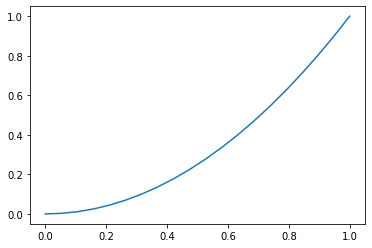

In [21]:
import numpy as np
import matplotlib.pyplot as plt
# keep graphs as part of notebook document
%matplotlib inline  

x = np.linspace(0,1,20)
y = x**2
plt.plot(x,y)

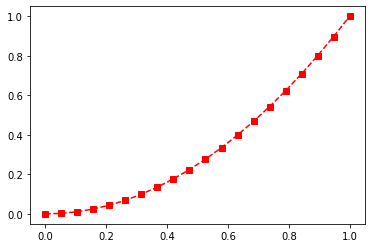

In [22]:
#plt.plot(x,y,color='red',linewidth = 5, linestyle = '--')
#plt.plot(x,y,color='red', linestyle = '-',marker='s')
plt.plot(x,y,'r--s')

[None, None, None]

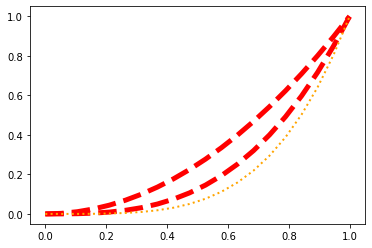

In [23]:
line_2_3 = plt.plot(x,y,x,x**3) #more than one plot simultaneously
plt.setp(line_2_3,color='red',linewidth = 5, linestyle = '--')
line_4 = plt.plot(x,x**4) #more than one plot simultaneously
plt.setp(line_4,color='orange',linewidth = 2, linestyle = ':')

In [24]:
from IPython.display import Image

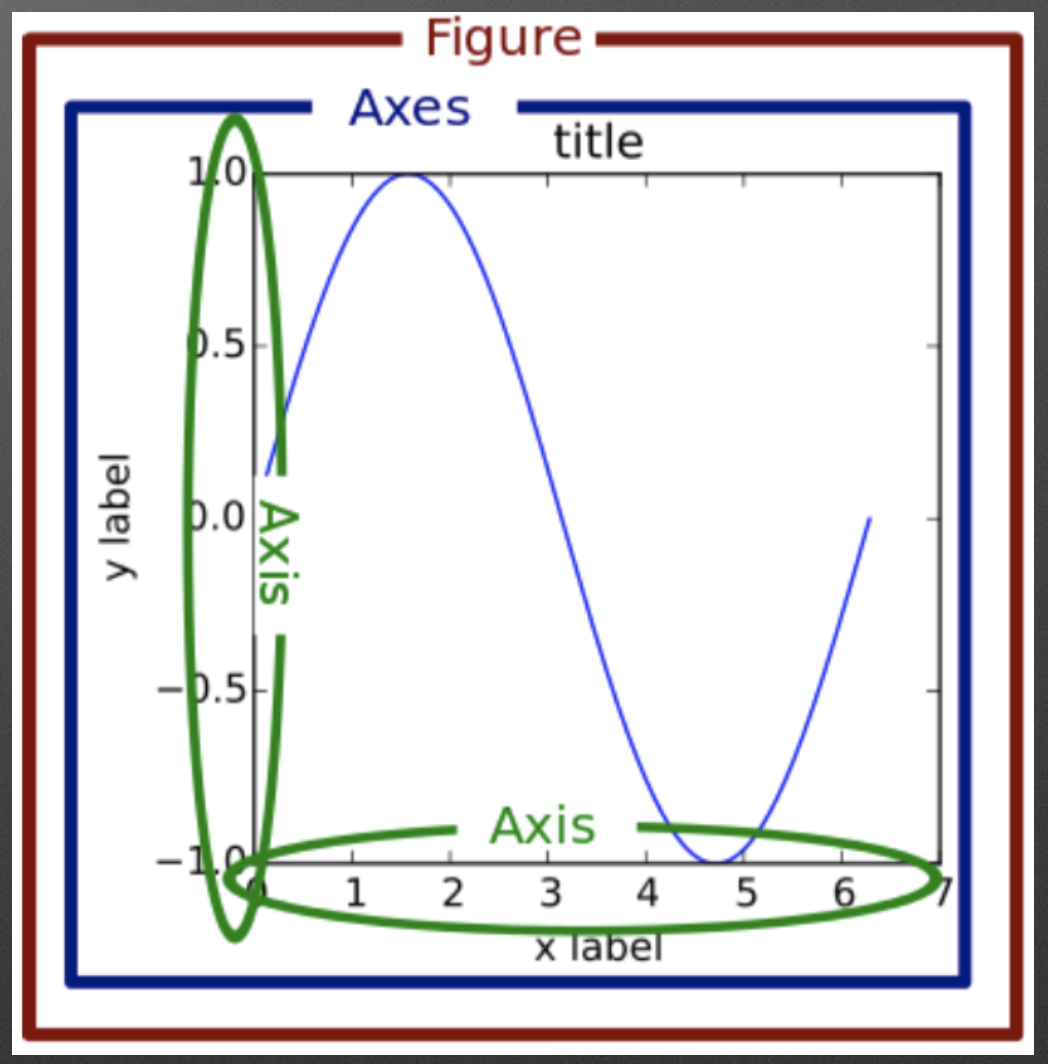

In [32]:
Image("plt_components.png", height=800, width=800)

- An __axes__ is what you normally think of as a 'plot'. There can be many axes in a figure.
- An __axis__ is a number-line like object that sets the graph limits and displays ticks and tick labels. There are two axis objects in an axes.
- An artist is the basis for all the items in a figure. The artists are the objects that are drawn on the canvas.
- A patch is a collection of artists 

### Figures and Axes
- Matplotlib has the concept of a current figure and current axes
- Many matplotlib commands operate on the current figure/axes (such as plot())
- The __gca()__ function returns the current axes, the __sca()__ function sets the current axes, the __cla()__ function clears the current axes
- The __gcf()__ function returns the current figure, the __figure()__ function sets the current figure or creates a new figure (figure() takes a figure number as argument), the __clf()__ function clears the current figure
- An initial figure and axes will be created automatically

### Subplots
- A subplot is another name for an axes
- The __subplot()__ function creates new axes and arranges them in a grid pattern based on it's arguments
- Subplot arguments are num_rows, num_cols, and subplot_number
- If you want to place the axes manually (i.e. not in a grid) use the axes() function to specify left, bottom, width, height

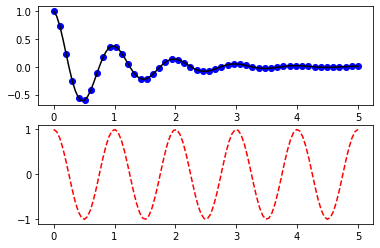

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return(np.exp(-t) * np.cos(2.0*np.pi*t))

t1 = np.linspace(0.0, 5.0, 50)
t2 = np.linspace(0.0, 5.0, 100)

plt.figure(1) # redundant
plt.subplot(2, 1, 1)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(2, 1, 2)
plt.plot(t2, np.cos(2.0*np.pi*t2), 'r--')

### Text
- Text can be added to arbitrary locations, or to the axes and tiles
- Properties can be customized with keyword arguments or using __setp()__ 
- The following commands are used to create text
    - text() - add text at an arbitrary location to the Axes
    - xlabel() - add an axis label to the x-axis
    - ylabel() - add an axis label to the y-axis
    - title() - add a title to the Axes 
    - figtext() - add text at an arbitrary location to the Figure
    - suptitle() - add a title to the Figure
    - annotate() - add an annotation, with optional arrow, to the Axes
- Many [properties](https://matplotlib.org/api/text_api.html)

### Hello World

C:\Users\cdsla\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


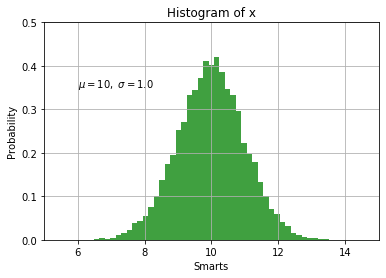

In [34]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 10.0, 1.0
x = np.random.normal(mu,sigma,size=10000)

# generates a histogram from x
plt.hist(x,50,normed=1,facecolor='g',alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of x')
# positionning the text and using latex fonts
plt.text(6.0, 0.35, r'$\mu=10,\ \sigma=1.0$')
# limiting x and y range
plt.axis([5, 15, 0, 0.5])
# background grid
plt.grid(True)


Text(3, 1.3, 'local max')

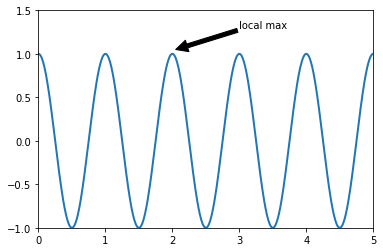

In [35]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.subplot(111)
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)
plt.axis([0.0, 5.0, -1.0, 1.5])

plt.annotate('local max', xy=(2.05,1.05), xytext=(3,1.3), arrowprops=dict(facecolor='black'))

### Legend

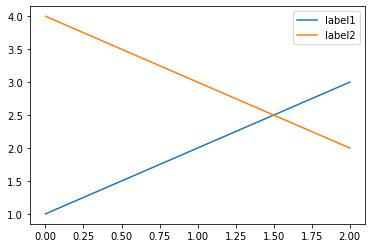

In [36]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot([1,2,3], label="label1")
plt.plot([4,3,2], label="label2")

plt.legend()

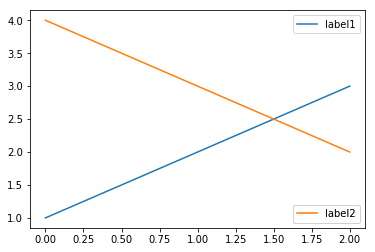

In [121]:
# p1 and p2 are the artists
p1, = plt.plot([1,2,3])
p2, = plt.plot([4,3,2])

# l1 and l2 are also artistis
# The loc argument specifies the location (1='upper right', 4='lower right', etc.)
l1 = plt.legend([p1],['label1'], loc=1)
l2 = plt.legend([p2],['label2'], loc=4)

# more than one label in the same axes have to the add manually
plt.gca().add_artist(l1)
plt.gca().add_artist(l2)

__See also:__
- bar()
- scatter()
- stackplot()
- matshow()

[More](https://realpython.com/python-matplotlib-guide/)